In [7]:
#importing required libraries

import pandas as pd
import numpy as np
import random
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image
import glob

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


##### Function to Show Images

In [12]:
def show_images(img1, img2, name):
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray")
    plt.title('Brain Image with Tumor')
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title('Brain Image without Tumor')
    plt.savefig('../images/{}'.format(name))

##### Load Images from Dataset

In [13]:
images_to_show = (33,18)
size_images = 128

#import images function
def import_data():
    def read_images(path):
        return [Image.open(file) for file in glob.glob(path)]
    
    path_yes = 'C:/Users/Windows 10/Project/Brain-Tumor-Detections---Image-Processing/DataSet MRI Images/yes/*'
    path_no = 'C:/Users/Windows 10/Project/Brain-Tumor-Detections---Image-Processing/DataSet MRI Images/no/*'
    
    images_yes = read_images(path_yes)
    images_no = read_images(path_no)
    
    print('Images Imported Complete')
    show_images(images_yes[images_to_show[0]], images_no[images_to_show[1]], '0-raw.png')
    return images_yes, images_no

Images Imported Complete
Images Imported Complete


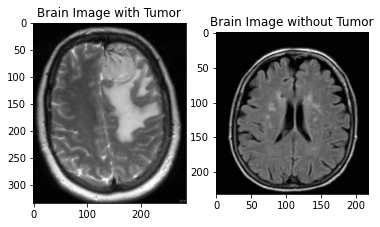

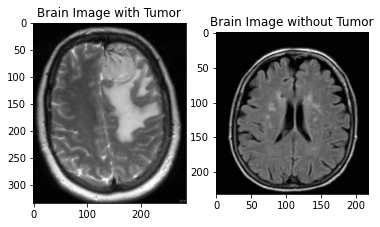

In [14]:
#FunctionCall --> import_data()
images_y, images_n = import_data()

##### Image Preprocessing (Data preparation)

In [43]:
def preparation(images_y, images_n):
    
    '''
    func sqaure_image -->
    1) Squaring image
    2) desired_size: a square whose side is the max between original base and height
    3) create a black image with the desired size
    4) paste the original image in the 'center' of the new image
    '''
    
    def square_image(list_of_images):
        res = []
        for img in list_of_images:
            desired_size = (max(img.size), max(img.size))
            position = int(max(img.size)/2) - int(min(img.size)/2)
            sq_img = Image.new("RGB", desired_size, color='black')
            
            if img.size[0] < img.size[1]:
                sq_img.paste(img, (0, position))
            else:
                sq_img.paste(img, (position,0))
                
            res.append(sq_img)
        return res
    
    #Function call to square_image    
    images_y, images_n = square_image(images_y), square_image(images_n)
    print('Squared Images')
    show_images(images_y[images_to_show[0]], images_n[images_to_show[1]],'1-squared.png')
    
    '''
    func resize_images -->
    Reshape all images to 128x128
    '''
    def resize_images(list_of_images, size=size_images):
        return [img.resize((size, size)) for img in list_of_images]
    
    
    #Function call to resize_image
    images_y, images_n = resize_images(images_y), resize_images(images_n)
    print('Resized Images')
    show_images(images_y[images_to_show[0]], images_n[images_to_show[1]], '2-resized.png')
    
    
    '''
    func image_to_nparray -->
    Convert images to numpy array in order to use open cv library as it doesn't work with images
    '''  
    def image_to_nparray(list_of_images):
        return[np.array(img) for img in list_of_images]
    
    images_y, images_n = image_to_nparray(images_y), image_to_nparray(images_n)
    print('Converted Images as np arrays')

Squared Images
Squared Images
Resized Images
Converted Images as np arrays
Resized Images
Converted Images as np arrays


<ipython-input-12-b9a56899442e>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-12-b9a56899442e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-12-b9a56899442e>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

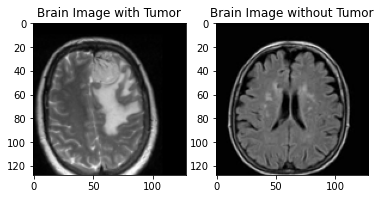

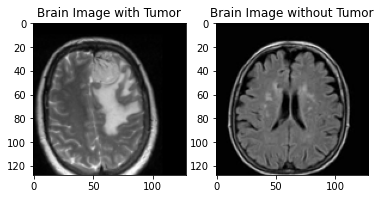

In [44]:
preparation(images_y, images_n)